<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Copia_de_EDO_HOM_LIMPIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a cargar y leer 2 archivos:
  1. pob_ini_proyecciones.csv --> Contiene el total de la población por años. Fuente: CONAPO 
  2. INEGI_exporta_12_4_2023_8_47_22.xls --> Contiene el número de homicidios para hombres y mujeres por año y por estado. Fuente:INEGI

In [1]:
import pandas as pd
import numpy as np

from google.colab import files 
import io
upload = files.upload()

Saving pob_ini_proyecciones.csv to pob_ini_proyecciones.csv
Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [ ]:
#upload1 = files.upload()

Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [2]:
df_P=pd.read_csv(io.BytesIO(upload["pob_ini_proyecciones.csv"]), header=0, encoding="ISO-8859-1")
df_P #Para ver las primeras 10 filas

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,564510
1,2,1950,República Mexicana,0,0,Mujeres,552054
2,3,1950,República Mexicana,0,1,Hombres,505655
3,4,1950,República Mexicana,0,1,Mujeres,496559
4,5,1950,República Mexicana,0,2,Hombres,470139
...,...,...,...,...,...,...,...
599715,599716,2051,Zacatecas,32,107,Mujeres,4
599716,599717,2051,Zacatecas,32,108,Hombres,1
599717,599718,2051,Zacatecas,32,108,Mujeres,2
599718,599719,2051,Zacatecas,32,109,Hombres,0


In [ ]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599720 entries, 0 to 599719
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   RENGLON    599720 non-null  int64 
 1   AÑO        599720 non-null  int64 
 2   ENTIDAD    599720 non-null  object
 3   CVE_GEO    599720 non-null  int64 
 4   EDAD       599720 non-null  int64 
 5   SEXO       599720 non-null  object
 6   POBLACION  599720 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 32.0+ MB


In [3]:
df_Homicidios=pd.read_excel(io.BytesIO(upload["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)#df con los datos de homicidio
df_Homicidios.head(10) #Para ver las primeras 10 filas

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
5,2000,Coahuila de Zaragoza,104,16,120
6,2000,Colima,48,9,57
7,2000,Chiapas,377,52,429
8,2000,Chihuahua,530,58,588
9,2000,Ciudad de México,815,109,924


In [4]:
df_Homicidios

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
...,...,...,...,...,...
722,2021,Tlaxcala,131,29,160
723,2021,Veracruz de Ignacio de la Llave,812,109,922
724,2021,Yucatán,47,8,55
725,2021,Zacatecas,1578,171,1767


In [5]:
df_homicidios=df_Homicidios.copy()
df_homicidios.drop(columns=['Total'], inplace=True, axis=1)
df_homicidios

,AÑO,EDO,Hombre,Mujer
0,2000,Total,9442,1284
1,2000,Aguascalientes,13,4
2,2000,Baja California,408,32
3,2000,Baja California Sur,23,5
4,2000,Campeche,60,5
...,...,...,...,...
722,2021,Tlaxcala,131,29
723,2021,Veracruz de Ignacio de la Llave,812,109
724,2021,Yucatán,47,8
725,2021,Zacatecas,1578,171


In [6]:
df_homicidios.rename({'EDO': 'ENTIDAD', 'Hombre': 'HOMBRES','Mujer': 'MUJERES' }, axis=1, inplace=True)
df_homicidios

,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,Total,9442,1284
1,2000,Aguascalientes,13,4
2,2000,Baja California,408,32
3,2000,Baja California Sur,23,5
4,2000,Campeche,60,5
...,...,...,...,...
722,2021,Tlaxcala,131,29
723,2021,Veracruz de Ignacio de la Llave,812,109
724,2021,Yucatán,47,8
725,2021,Zacatecas,1578,171


In [ ]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AÑO      727 non-null    int64 
 1   ENTIDAD  727 non-null    object
 2   HOMBRES  727 non-null    int64 
 3   MUJERES  727 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.8+ KB


In [ ]:
df_homicidios.shape

(727, 4)

In [ ]:
#df_homicidios.to_excel('df_homicidios.xlsx', sheet_name='homicidios') #guardamos el df en un archivo tipo excel

In [ ]:
#df_homicidios.to_csv('df_homicidios.csv')

**NOTAS:**

    *df_Homicidios: INEGI con columna Total

    *df_homicidios: INEGI sin la colimuna Total

##Vamos a ordenar el df_P para poderlo usar


In [7]:
#Creamos un df_P1 que tendrá los datos desde el añoo 2000 hasta el 2021
df_P1 = df_P[df_P["AÑO"] >= 2000] 
df_P1 = df_P1[df_P1["AÑO"] <= 2021]
df_P1

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
11000,11001,2000,República Mexicana,0,0,Hombres,1161986
11001,11002,2000,República Mexicana,0,0,Mujeres,1120877
11002,11003,2000,República Mexicana,0,1,Hombres,1162710
11003,11004,2000,República Mexicana,0,1,Mujeres,1119109
11004,11005,2000,República Mexicana,0,2,Hombres,1165350
...,...,...,...,...,...,...,...
593115,593116,2021,Zacatecas,32,107,Mujeres,1
593116,593117,2021,Zacatecas,32,108,Hombres,0
593117,593118,2021,Zacatecas,32,108,Mujeres,0
593118,593119,2021,Zacatecas,32,109,Hombres,0


In [ ]:
#df_P1.to_excel('CONAPO_POB_Años.xlsx', sheet_name='POBLACION_Años') 
#df_P1.to_csv('CONAPO_POB_Años.csv')

In [8]:
columns = ["AÑO", "ENTIDAD", "HOMBRES", "MUJERES"] #Serán el nombre de nuestars columnas
mtrx = [] #Creamos una matriz vacía

for ano in df_P1["AÑO"].unique(): #Vamos a filtrar por año usando unique
  values_ano = df_P1[df_P1["AÑO"] == ano] 
  for estado in values_ano["ENTIDAD"].unique(): #Vamos a filtrar por estado usando unique
    tmp = [] #Este temporal nos irá guardando unen una lista los datos para ir formando un arreglo
    tmp.append(ano) #Añadimos al tmp el año, el primer elemento del tmp será el año
    tmp.append(estado)  #Añadimos al tmp el estado, el segundo elemento del tmp será el estado
    values_ano_entidad = values_ano[values_ano["ENTIDAD"] == estado]
    for sexo in values_ano_entidad["SEXO"].unique(): #Vamos a filtrar por estado usando unique
      #print("Analizando a: " + sexo + "...")
      values_ano_entidad_sexo = values_ano_entidad[values_ano_entidad["SEXO"] == sexo]
      poblacion = values_ano_entidad_sexo["POBLACION"].sum()#Sumamos para tener el total de la población de cada sexo
      tmp.append(poblacion)#Añadimos al tmp el sexo, el tercer elemento del tmp será Hombres y el cuarto Mujeres
    mtrx.append(tmp)#A la matriz le añadimos el arreglo. Ahora el ciclo se repetira para el siguiente año

array = np.array(mtrx) #Hacemos un array tipo numpy para después poderlo convertir en df
#df_Pob tendrá los datos del total de la población por sexo en el mismo orden que los datos del INEGI
df_Pob = pd.DataFrame(data = array, columns = columns) 
df_Pob


,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,República Mexicana,48255807,49900635
1,2000,Aguascalientes,464024,488559
2,2000,Baja California,1247252,1211307
3,2000,Baja California Sur,219018,207555
4,2000,Campeche,350339,347621
...,...,...,...,...
721,2021,Tamaulipas,1812500,1852763
722,2021,Tlaxcala,676446,711366
723,2021,Veracruz,4156871,4408019
724,2021,Yucatán,1118236,1153344


In [ ]:
#df_Pob.to_excel('CONAPO_POB.xlsx', sheet_name='POBLACION') #guardamos el df en un archivo tipo excel

In [ ]:
#df_Pob.to_csv('CONAPO_POB.csv')

##Ahora vamos a juntar los dataframes en uno solo llamado df

In [9]:
df = df_homicidios.copy()
df=df.append(df_Pob, ignore_index=True )
df

<ipython-input-9-4b0024770edb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_Pob, ignore_index=True )


,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,Total,9442,1284
1,2000,Aguascalientes,13,4
2,2000,Baja California,408,32
3,2000,Baja California Sur,23,5
4,2000,Campeche,60,5
...,...,...,...,...
1448,2021,Tamaulipas,1812500,1852763
1449,2021,Tlaxcala,676446,711366
1450,2021,Veracruz,4156871,4408019
1451,2021,Yucatán,1118236,1153344


In [ ]:
#df.to_csv('df_edo_sexo.csv') #guardamos el df en un archivo tipo excel

In [ ]:
#df.to_excel('df_edo_sexo.xlsx', sheet_name='df_edo_sexo') #guardamos el df en un archivo tipo excel

##VAMOS A CALCULAR LA TASA NACIONAL DE HOMICIDIOS

Tasa x 100,000 habitantes= (No. Total de homicidios/Población total)*100,000

In [ ]:
df_Pob.iloc[0]['HOMBRES']

'48255807'

In [ ]:
df_Pob.iloc[66]

AÑO                      2002
ENTIDAD    República Mexicana
HOMBRES              49470707
MUJERES              51325800
Name: 66, dtype: object

In [ ]:
df.iloc[0]

AÑO         2000
ENTIDAD    Total
HOMBRES     9442
MUJERES     1284
Name: 0, dtype: object

In [10]:
Homicidios_H=[]
Homicidios_M=[]
tasas_H=[]
tasas_M=[]
for i in range(0,len(df_homicidios)-33,33):
  Homicidios_H.append(df.iloc[i]['HOMBRES'])
  Homicidios_M.append(df.iloc[i]['MUJERES'])
  tasas_H.append( (df.iloc[i]['HOMBRES']/float(df_Pob.iloc[i]['HOMBRES']) )*100000 )
  tasas_M.append((df.iloc[i]['MUJERES']/float(df_Pob.iloc[i]['MUJERES']))*100000)

In [11]:
import matplotlib.pyplot as plt

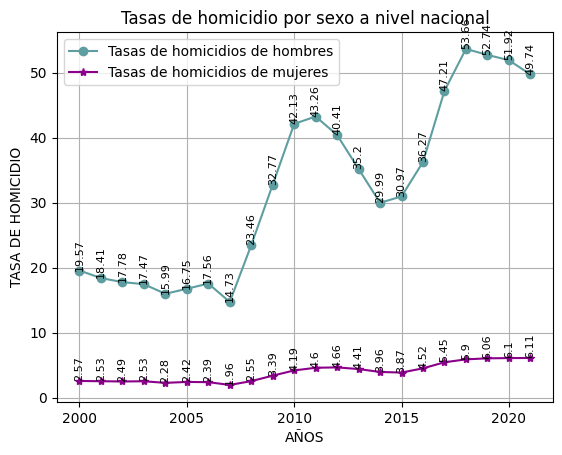

<Figure size 640x480 with 0 Axes>

In [17]:
years=list(range(2000, 2022))
plt.plot(years,tasas_H, label='Tasas de homicidios de hombres', color='#5F9EA0', marker='o')
plt.plot(years, tasas_M, label='Tasas de homicidios de mujeres', color='#8B008B', marker='*')
plt.xlabel('AÑOS')#Nombre del eje
plt.ylabel('TASA DE HOMICIDIO')
plt.title('Tasas de homicidio por sexo a nivel nacional') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba

for x, y1, y2 in zip(years, tasas_H, tasas_M):
    plt.text(x, y1, str(round(y1, 2)), ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(x, y2, str(round(y2, 2)), ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()
plt.savefig("Tasas de homicidio por sexo a nivel nacional.png")

In [18]:
df_tasasH = pd.DataFrame(tasas_H, columns=['Tasas Hom'])
df_tasasM = pd.DataFrame(tasas_M, columns=['Tasas Muj'])

In [19]:
df_tasasH

,Tasas Hom
0,19.566557
1,18.405173
2,17.782240
3,17.467122
4,15.985377
5,16.751474
6,17.563165
7,14.727894
8,23.461008
9,32.774035


In [ ]:
df_tasasM

,Tasas Muj
0,2.573114
1,2.534226
2,2.493872
3,2.527316
4,2.283039
5,2.421877
6,2.389298
7,1.964583
8,2.546142
9,3.388012


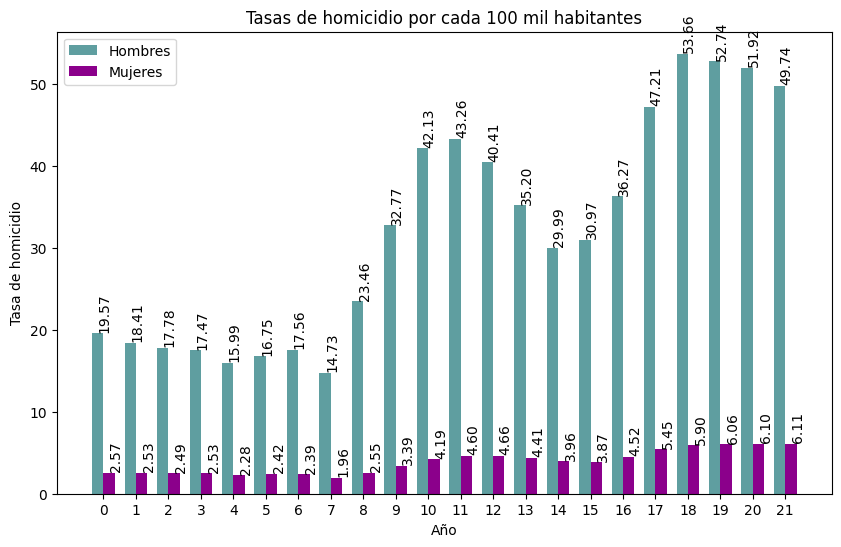

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores para los ejes x e y para ambos DataFrames
x = np.arange(len(df_tasasM))
y_hom = df_tasasH['Tasas Hom']
y_muj = df_tasasM['Tasas Muj']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar las barras de hombres y mujeres en el mismo gráfico
width = 0.35
plt.bar(x - width/2, y_hom, width, label='Hombres', color='#5F9EA0')
plt.bar(x + width/2, y_muj, width, label='Mujeres', color='#8B008B')

# Configurar los ejes x e y
plt.xlabel('Año')
plt.ylabel('Tasa de homicidio')
plt.title('Tasas de homicidio por cada 100 mil habitantes')
plt.xticks(x, np.arange(0, 22, 1))

# Agregar leyenda
plt.legend()

for i in range(len(df_tasasM)):
    plt.text(x = x[i]-width/2 , y = y_hom[i]+0.5, s = "{:.2f}".format(y_hom[i]), size = 10, rotation=90)
    plt.text(x = x[i]+width/2 , y = y_muj[i]+0.5, s = "{:.2f}".format(y_muj[i]), size = 10, rotation=90)

# Mostrar el gráfico
plt.show()


In [23]:
tasas = pd.concat([df_tasasH, df_tasasM], axis=1)

In [24]:
tasas

,Tasas Hom,Tasas Muj
0,19.566557,2.573114
1,18.405173,2.534226
2,17.782240,2.493872
3,17.467122,2.527316
4,15.985377,2.283039
5,16.751474,2.421877
6,17.563165,2.389298
7,14.727894,1.964583
8,23.461008,2.546142
9,32.774035,3.388012


In [ ]:
tasas.describe()

,Tasas Hom,Tasas Muj
count,22.000000,22.000000
mean,32.180829,3.860629
std,13.796589,1.429262
min,14.727894,1.964583
25%,17.937973,2.529043
50%,31.870348,3.913578
75%,42.979527,4.646755
max,53.661448,6.106931


##Tasas de homicidio por Edo

In [25]:
#Tasas de homicidio por estado
Estados_Ho=[]
Estados_Mu=[]
tasas_Ho=[]
temp_Ho=[]
for edos in range (1, 33,1):
  #temp_Ho=[]
  temp_Edo_Ho=[]
  for i in range(edos,len(df_homicidios),33):
    tasas_Ho.append( (df.iloc[i]['HOMBRES']/float(df_Pob.iloc[i]['HOMBRES']) )*100000 )
  Estados_Ho.append(tasas_Ho)
  tasas_Ho=[]
  temp_Ho=[]


print(len(Estados_Ho[0]))

22


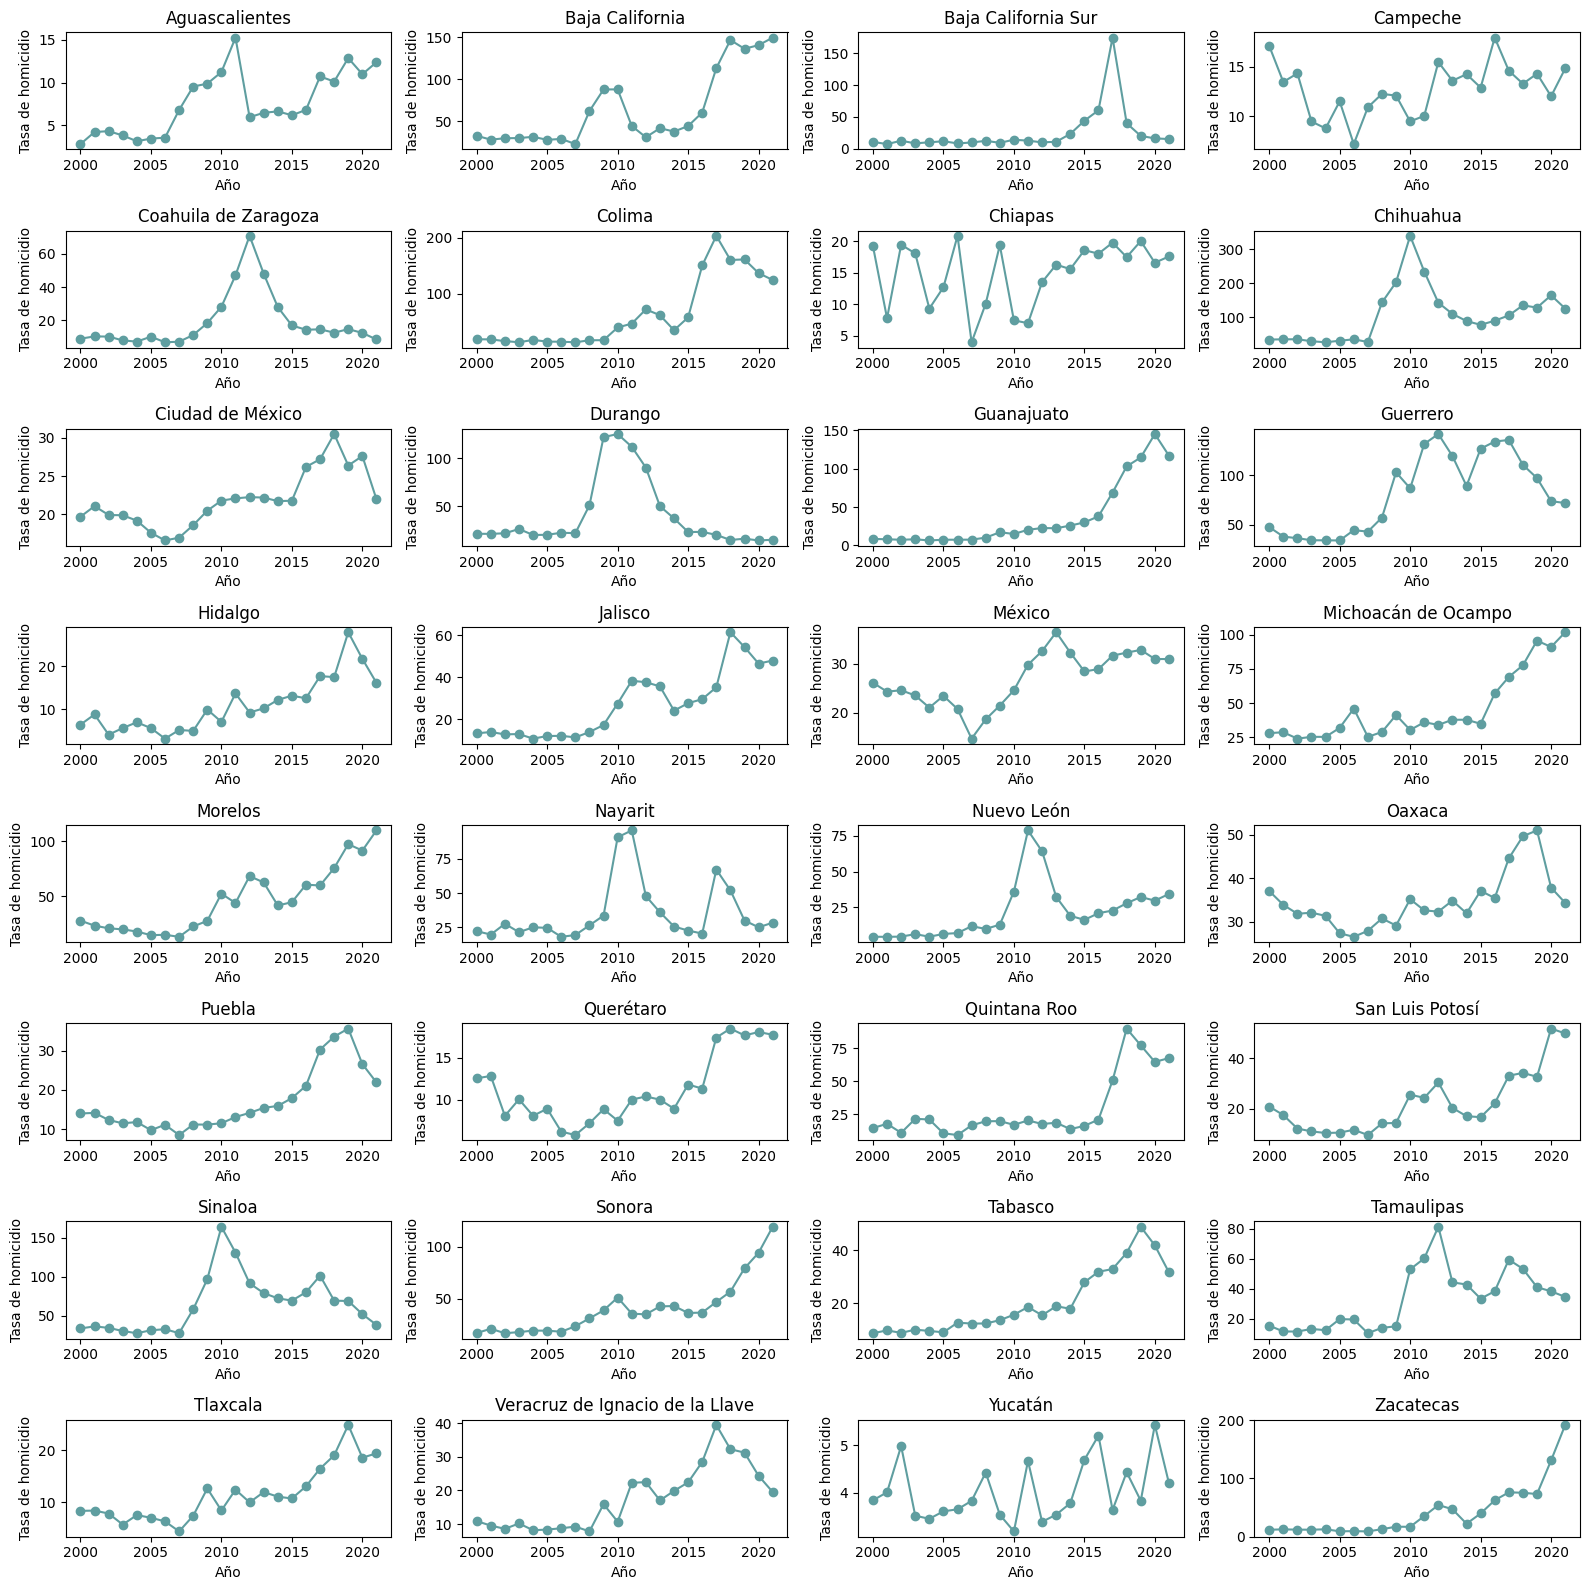

<Figure size 640x480 with 0 Axes>

In [27]:
# lista de los nombres de los 32 estados de la república mexicana
states = ['Aguascalientes','Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
          'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
          'Jalisco', 'México', 'Michoacán de Ocampo', 'Morelos', 'Nayarit','Nuevo León', 'Oaxaca', 
          'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
          'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']
# crear una figura y un conjunto de subtramas para cada estado
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(16, 16))
# iterar sobre cada subtrama y graficar las tasas de homicidio para cada estado
for i, ax in enumerate(axes.flatten()):
    # obtener las tasas de homicidio para el estado actual
    state_homicides = Estados_Ho[i]

    # crear una lista de años desde 2000 hasta 2021
    years = [year for year in range(2000, 2022)]

    # graficar las tasas de homicidio en función de los años
    ax.plot(years, state_homicides, color='#5F9EA0', marker='o')

    # establecer el título de la subtrama como el nombre del estado
    ax.set_title(states[i])

    # establecer las etiquetas de los ejes
    ax.set_xlabel("Año")
    ax.set_ylabel("Tasa de homicidio")

# ajustar el espaciado entre las subtramas
plt.tight_layout()

# mostrar el gráfico
plt.show()

plt.savefig("Tasas de homicidio de hombres por estado.png")

In [28]:
df_EdosH = pd.DataFrame(Estados_Ho, columns=years)
df_EdosH #El índice representa el Estado 

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2.801579,4.211307,4.314596,3.810532,3.133169,3.443928,3.550977,6.785418,9.528621,9.866068,...,5.948299,6.457696,6.625693,6.172763,6.796905,10.708406,10.110290,12.856144,10.969833,12.371870
1,32.711914,28.078583,29.783151,29.983726,31.452106,27.891260,28.975142,22.822983,62.055403,87.699086,...,30.947899,41.669396,37.709840,44.289993,60.332540,113.047064,146.397203,136.058409,140.342115,149.244511
2,10.501420,7.052093,12.329041,8.207620,9.909428,11.498791,8.155246,9.566937,12.193470,9.069678,...,9.772971,10.696300,23.141419,43.855778,60.419212,174.973978,39.942277,19.922077,16.054258,15.008182
3,17.126269,13.478943,14.343957,9.485172,8.787112,11.517752,7.202443,10.919886,12.273504,12.100409,...,15.491321,13.600926,14.262816,12.909429,17.953086,14.613662,13.297985,14.310513,12.029621,14.838789
4,8.997007,10.374661,10.267609,7.950794,7.245035,10.204122,6.838191,7.189980,11.208393,18.413986,...,70.931219,48.154404,28.039392,16.945448,14.390789,14.638188,12.628630,14.742599,12.477569,8.540043
5,17.842739,17.642518,14.514157,12.540398,16.630634,13.634028,13.466479,12.441784,16.034766,16.237384,...,71.520526,61.088962,34.120396,57.159752,150.521568,203.703050,160.354755,161.285670,136.705400,124.376215
6,19.199166,7.760624,19.416101,18.053556,9.293152,12.674921,20.831664,3.950937,10.074002,19.346010,...,13.490370,16.262051,15.550648,18.555420,18.001807,19.749675,17.456189,20.005393,16.559318,17.567671
7,34.582794,35.238806,35.440632,29.625083,26.562771,31.149780,35.179083,27.473676,143.673903,203.276772,...,142.952069,110.039254,89.043038,77.930523,89.980222,105.644514,135.373445,128.617017,164.783026,125.906389
8,19.656961,21.044776,19.882313,19.851098,19.139864,17.554696,16.540792,16.909569,18.551237,20.449645,...,22.229080,22.173154,21.701414,21.759090,26.195299,27.201703,30.511515,26.378942,27.625681,21.958585
9,20.923111,20.864762,21.454390,25.929359,19.676011,19.873913,22.012947,21.605855,50.745644,122.094623,...,90.242459,49.814931,37.015076,22.775837,22.929510,19.799898,14.408360,15.819847,13.942474,14.693362


In [29]:
df_EdosH.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,18.042240,16.993229,16.376301,15.985296,15.220533,15.439645,16.020593,14.365651,24.066975,34.346962,...,42.171867,35.492543,29.222393,31.577956,39.876117,55.111712,53.520752,53.649372,53.476577,53.529712
std,10.811000,9.813030,9.691484,9.093440,8.921661,9.066581,11.350301,9.030257,26.961899,42.882702,...,36.672103,27.570733,20.836933,24.356177,34.145463,48.021861,41.348028,41.127584,46.303483,49.178618
min,2.801579,4.014002,4.083709,3.523468,3.133169,3.443928,3.161177,3.834454,4.426028,3.543376,...,3.396536,3.544957,3.785386,4.692749,5.200105,3.644202,4.434356,3.837092,5.422557,4.203048
25%,10.125317,9.382066,8.708954,9.165784,8.182735,8.961430,7.435234,8.268689,10.187164,12.654801,...,15.070739,16.052575,15.829399,16.606020,19.825263,19.787342,18.855227,23.610362,18.415466,17.683611
50%,16.106386,14.067846,12.601296,12.780080,12.159653,11.801354,12.386663,11.517680,14.049084,17.262828,...,31.629512,33.511437,23.644649,25.230739,28.683149,37.338516,39.441512,34.246176,34.389587,32.915424
75%,23.184835,21.663698,22.086916,22.125750,21.094363,20.795467,20.806860,19.935157,27.058965,30.214461,...,65.256903,44.975730,37.188767,37.742423,57.876166,68.919414,75.503972,77.612015,78.095561,79.428665
max,47.752037,38.154827,36.539095,34.489635,34.402416,34.266075,45.993087,43.169133,143.673903,203.276772,...,142.952069,119.185734,89.132479,126.605508,150.521568,203.703050,160.354755,161.285670,164.783026,192.089515


In [ ]:
df_EdosH.min()

2000    2.801579
2001    4.014002
2002    4.083709
2003    3.523468
2004    3.133169
2005    3.443928
2006    3.161177
2007    3.834454
2008    4.426028
2009    3.543376
2010    3.194947
2011    4.668766
2012    3.396536
2013    3.544957
2014    3.785386
2015    4.692749
2016    5.200105
2017    3.644202
2018    4.434356
2019    3.837092
2020    5.422557
2021    4.203048
dtype: float64

In [ ]:
df_EdosH[2021]

0      12.371870
1     149.244511
2      15.008182
3      14.838789
4       8.540043
5     124.376215
6      17.567671
7     125.906389
8      21.958585
9      14.693362
10    116.876586
11     71.955063
12     16.136206
13     47.957509
14     30.964542
15    101.849473
16    109.824531
17     28.368007
18     34.256414
19     34.303631
20     21.926031
21     17.722258
22     67.437708
23     49.936671
24     37.916703
25    119.598710
26     31.574433
27     34.648276
28     19.365921
29     19.533923
30      4.203048
31    192.089515
Name: 2021, dtype: float64

In [30]:
df_Min_H=pd.DataFrame(df_EdosH.min(), columns=['Tasas'])
nueva_columna1 = ['Aguascalientes', 'Yucatán', 'Hidalgo','Yucatán', 'Aguascalientes', 'Aguascalientes', 'Hidalgo', 'Yucatán', 'Yucatán',
                 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán',
                 'Yucatán', 'Yucatán', 'Yucatán'] 
df_Min_H['EDO']= nueva_columna1
df_Min_H

,Tasas,EDO
2000,2.801579,Aguascalientes
2001,4.014002,Yucatán
2002,4.083709,Hidalgo
2003,3.523468,Yucatán
2004,3.133169,Aguascalientes
2005,3.443928,Aguascalientes
2006,3.161177,Hidalgo
2007,3.834454,Yucatán
2008,4.426028,Yucatán
2009,3.543376,Yucatán


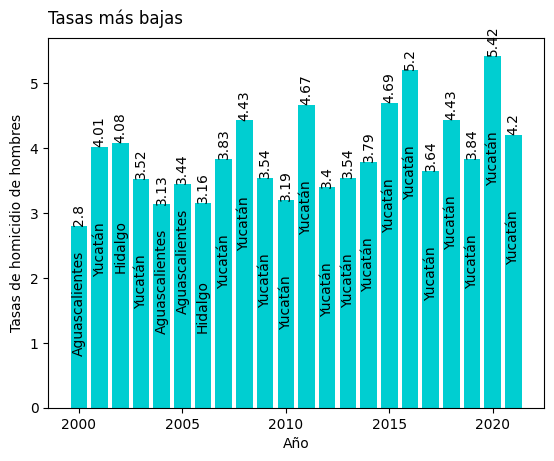

In [31]:
# Obtener los valores más altos de cada año
valores_minimos = df_EdosH.min()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
barras = ax.bar(valores_minimos.index, valores_minimos.values, color='#00CED1')

# Agregar etiquetas a las barras
for i, barra in enumerate(barras):
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), round(valores_minimos.values[i], 2),
            ha='center', va='bottom', rotation=90)
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height() - 2, df_Min_H.loc[df_Min_H['Tasas']==valores_minimos.values[i], 'EDO'].values[0],
            ha='center', va='bottom', rotation=90)
# Agregar etiquetas a las barras

# Agregar título y etiquetas de los ejes
ax.set_title('Tasas más bajas', loc='left', pad=10)
ax.set_xlabel('Año')
ax.set_ylabel('Tasas de homicidio de hombres')

# Mostrar la gráfica
plt.show()

In [32]:
bajos_H= pd.DataFrame(df_EdosH.loc[0])
bajos_H

,0
2000,2.801579
2001,4.211307
2002,4.314596
2003,3.810532
2004,3.133169
2005,3.443928
2006,3.550977
2007,6.785418
2008,9.528621
2009,9.866068


In [33]:
bajos_H['Aguascalientes'] = pd.DataFrame(df_EdosH.loc[0])

In [34]:
bajos_H['Yucatán'] = pd.DataFrame(df_EdosH.loc[30])
bajos_H['Hidalgo'] = pd.DataFrame(df_EdosH.loc[12])
bajos_H

,0,Aguascalientes,Yucatán,Hidalgo
2000,2.801579,2.801579,3.845336,6.419907
2001,4.211307,4.211307,4.014002,8.786826
2002,4.314596,4.314596,4.980397,4.083709
2003,3.810532,3.810532,3.523468,5.626646
2004,3.133169,3.133169,3.458339,6.965559
2005,3.443928,3.443928,3.615345,5.607272
2006,3.550977,3.550977,3.657125,3.161177
2007,6.785418,6.785418,3.834454,5.173651
2008,9.528621,9.528621,4.426028,4.967896
2009,9.866068,9.866068,3.543376,9.932862


In [35]:
bajos_H = bajos_H.drop(0, axis=1)

In [36]:
bajos_H = bajos_H.reset_index()
bajos_H

,index,Aguascalientes,Yucatán,Hidalgo
0,2000,2.801579,3.845336,6.419907
1,2001,4.211307,4.014002,8.786826
2,2002,4.314596,4.980397,4.083709
3,2003,3.810532,3.523468,5.626646
4,2004,3.133169,3.458339,6.965559
5,2005,3.443928,3.615345,5.607272
6,2006,3.550977,3.657125,3.161177
7,2007,6.785418,3.834454,5.173651
8,2008,9.528621,4.426028,4.967896
9,2009,9.866068,3.543376,9.932862


In [ ]:
bajos_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           22 non-null     int64  
 1   Aguascalientes  22 non-null     float64
 2   Yucatán         22 non-null     float64
 3   Hidalgo         22 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 832.0 bytes


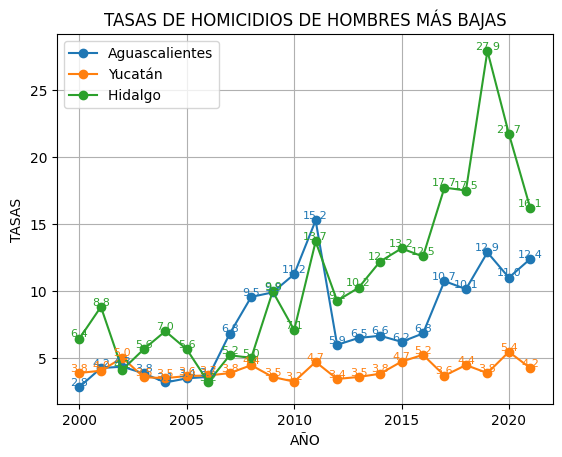

In [54]:
import matplotlib.pyplot as plt
plt.plot(bajos_H['index'], bajos_H['Aguascalientes'], label='Aguascalientes',  marker='o')
plt.plot(bajos_H['index'], bajos_H['Yucatán'], label='Yucatán ',  marker='o')
plt.plot(bajos_H['index'], bajos_H['Hidalgo'], label='Hidalgo ',  marker='o')

plt.xlabel('AÑO')#Nombre del eje
plt.ylabel('TASAS')
plt.title('TASAS DE HOMICIDIOS DE HOMBRES MÁS BAJAS') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba

spacing = 0.05  # Espacio entre etiquetas de texto

# Agregar etiquetas de valores en cada línea
for i, label in enumerate(['Aguascalientes', 'Yucatán', 'Hidalgo']):
    for x, y in zip(bajos_H['index'], bajos_H[label]):
        plt.text(x, y, f'{y:.1f}', fontsize=8, ha='center', va='bottom', color=f'C{i}')

plt.show()

In [50]:
df_Max_H=pd.DataFrame(df_EdosH.max(), columns=['Tasas'])
nueva_columna = ['Guerrero', 'Guerrero', 'Guerrero','Guerrero', 'Guerrero', 'Guerrero', 'Michoacán', 'Guerrero', 'Chihuahua',
                 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Guerrero', 'Guerrero', 'Guerrero', 'Colima', 'Colima', 'Colima',
                 'Colima', 'Chihuahua', 'Zacatecas'] 
df_Max_H['EDO']= nueva_columna
df_Max_H

,Tasas,EDO
2000,47.752037,Guerrero
2001,38.154827,Guerrero
2002,36.539095,Guerrero
2003,34.489635,Guerrero
2004,34.402416,Guerrero
2005,34.266075,Guerrero
2006,45.993087,Michoacán
2007,43.169133,Guerrero
2008,143.673903,Chihuahua
2009,203.276772,Chihuahua


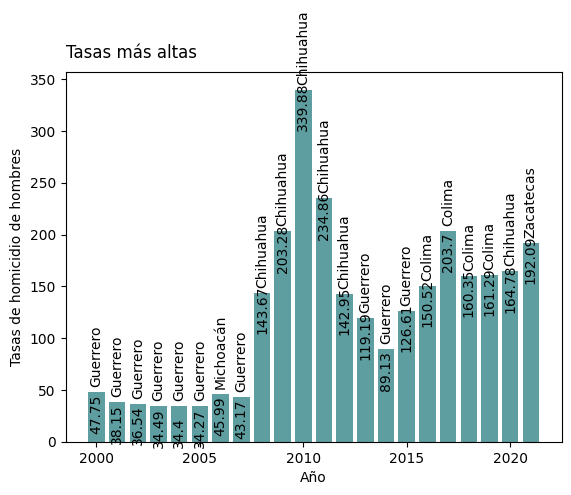

In [51]:
# Obtener los valores más altos de cada año
valores_maximos = df_EdosH.max()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
barras = ax.bar(valores_maximos.index, valores_maximos.values, color='#5F9EA0')

# Agregar etiquetas a las barras
for i, barra in enumerate(barras):
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height()-40, round(valores_maximos.values[i], 2),
            ha='center', va='bottom', rotation=90)
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height() +5, df_Max_H.loc[df_Max_H['Tasas']==valores_maximos.values[i], 'EDO'].values[0],
            ha='center', va='bottom', rotation=90)
# Agregar etiquetas a las barras

# Agregar título y etiquetas de los ejes
ax.set_title('Tasas más altas', loc='left', pad=10)
ax.set_xlabel('Año')
ax.set_ylabel('Tasas de homicidio de hombres')

# Mostrar la gráfica
plt.show()

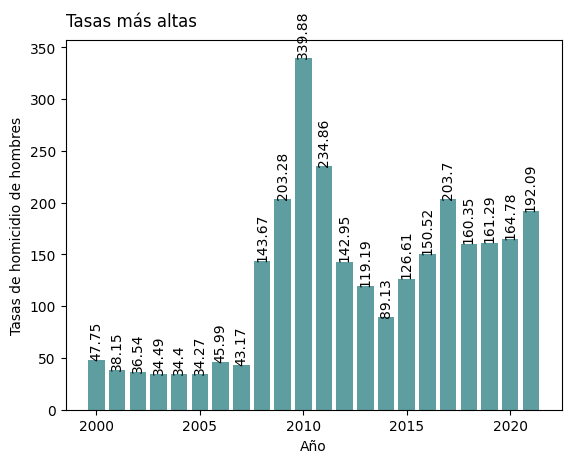

In [55]:
# Obtener los valores más altos de cada año
valores_maximos = df_EdosH.max()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
barras = ax.bar(valores_maximos.index, valores_maximos.values, color='#5F9EA0')

# Agregar etiquetas a las barras
for i, barra in enumerate(barras):
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), round(valores_maximos.values[i], 2),
            ha='center', va='bottom', rotation=90)
    #ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 5, df_Max_H.loc[df_Max_H['Tasas']==valores_maximos.values[i], 'EDO'].values[0],
            #ha='center', va='bottom', rotation=90)
# Agregar etiquetas a las barras

# Agregar título y etiquetas de los ejes
ax.set_title('Tasas más altas', loc='left', pad=10)
ax.set_xlabel('Año')
ax.set_ylabel('Tasas de homicidio de hombres')

# Mostrar la gráfica
plt.show()

0. 'Aguascalientes' 

1. 'Baja California' 

2. 'Baja California Sur'

3. 'Campeche': 
            
4. 'Coahuila de Zaragoza':

5. 'Colima':

6. 'Chiapas':

7. 'Chihuahua'
                    
8. 'Ciudad de México':

9. 'Durango': 

10. 'Guanajuato': 

11. 'Guerrero': 

12. 'Hidalgo': 

13. 'Jalisco':  
 
14. 'México':  

15. 'Michoacán de Ocampo':  

16. 'Morelos': 

17. 'Nayarit': 

18. 'Nuevo León':  

19. 'Oaxaca': 

20. 'Puebla': 

21. 'Querétaro':  
 
22. 'Quintana Roo': 

23. 'San Luis Potosí': 

24. 'Sinaloa': 

25. 'Sonora':  
26. 'Tabasco':
27. 'Tamaulipas':
28. 'Tlaxcala': 
29. 'Veracruz de Ignacio de la Llave'
30. 'Yucatán'
31. 'Zacatecas'

In [56]:
altos_H= pd.DataFrame(df_EdosH.loc[0])
altos_H['Guerrero'] = pd.DataFrame(df_EdosH.loc[11])
altos_H['Michoacán'] = pd.DataFrame(df_EdosH.loc[15])
altos_H['Chihuahua'] = pd.DataFrame(df_EdosH.loc[7])
altos_H['Colima'] = pd.DataFrame(df_EdosH.loc[5])
altos_H['Zacatecas'] = pd.DataFrame(df_EdosH.loc[31])
altos_H

,0,Guerrero,Michoacán,Chihuahua,Colima,Zacatecas
2000,2.801579,47.752037,28.049484,34.582794,17.842739,11.729041
2001,4.211307,38.154827,28.646673,35.238806,17.642518,12.427289
2002,4.314596,36.539095,23.984494,35.440632,14.514157,11.909423
2003,3.810532,34.489635,25.318523,29.625083,12.540398,11.843237
2004,3.133169,34.402416,25.276075,26.562771,16.630634,12.515516
2005,3.443928,34.266075,31.862711,31.149780,13.634028,9.083570
2006,3.550977,44.635929,45.993087,35.179083,13.466479,9.327012
2007,6.785418,43.169133,25.281557,27.473676,12.441784,8.899786
2008,9.528621,57.319644,28.858273,143.673903,16.034766,12.714971
2009,9.866068,102.848770,41.250785,203.276772,16.237384,16.957516


In [57]:
altos_H = altos_H.drop(0, axis=1)
altos_H = altos_H.reset_index()
altos_H

,index,Guerrero,Michoacán,Chihuahua,Colima,Zacatecas
0,2000,47.752037,28.049484,34.582794,17.842739,11.729041
1,2001,38.154827,28.646673,35.238806,17.642518,12.427289
2,2002,36.539095,23.984494,35.440632,14.514157,11.909423
3,2003,34.489635,25.318523,29.625083,12.540398,11.843237
4,2004,34.402416,25.276075,26.562771,16.630634,12.515516
5,2005,34.266075,31.862711,31.149780,13.634028,9.083570
6,2006,44.635929,45.993087,35.179083,13.466479,9.327012
7,2007,43.169133,25.281557,27.473676,12.441784,8.899786
8,2008,57.319644,28.858273,143.673903,16.034766,12.714971
9,2009,102.848770,41.250785,203.276772,16.237384,16.957516


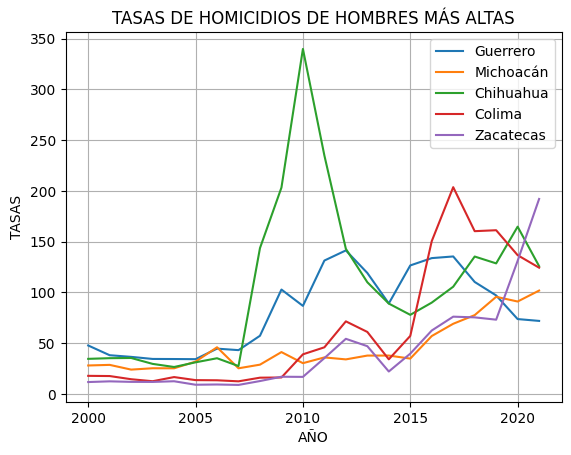

In [ ]:
plt.plot(altos_H['index'], altos_H['Guerrero'], label='Guerrero')
plt.plot(altos_H['index'], altos_H['Michoacán'], label='Michoacán')
plt.plot(altos_H['index'], altos_H['Chihuahua'], label='Chihuahua')
plt.plot(altos_H['index'], altos_H['Colima'], label='Colima')
plt.plot(altos_H['index'], altos_H['Zacatecas'], label='Zacatecas')


plt.xlabel('AÑO')#Nombre del eje
plt.ylabel('TASAS')
plt.title('TASAS DE HOMICIDIOS DE HOMBRES MÁS ALTAS') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba

In [ ]:
from pandas.io.formats.style_render import Subset
df_EdosH.style.background_gradient(subset=[2000, 2001, 2002,2003, 2004,2005,2006,2007,2008,2009,2010,
                                              2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021], 
                                            cmap='BuGn')
#Estamos poniendo un gradiente de tal forma que el verde más oscuro es para los valores más grandes

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2.801579,4.211307,4.314596,3.810532,3.133169,3.443928,3.550977,6.785418,9.528621,9.866068,11.220942,15.242715,5.948299,6.457696,6.625693,6.172763,6.796905,10.708406,10.110290,12.856144,10.969833,12.371870
1,32.711914,28.078583,29.783151,29.983726,31.452106,27.891260,28.975142,22.822983,62.055403,87.699086,87.806463,44.343241,30.947899,41.669396,37.709840,44.289993,60.332540,113.047064,146.397203,136.058409,140.342115,149.244511
2,10.501420,7.052093,12.329041,8.207620,9.909428,11.498791,8.155246,9.566937,12.193470,9.069678,13.951455,12.458787,9.772971,10.696300,23.141419,43.855778,60.419212,174.973978,39.942277,19.922077,16.054258,15.008182
3,17.126269,13.478943,14.343957,9.485172,8.787112,11.517752,7.202443,10.919886,12.273504,12.100409,9.494272,10.052849,15.491321,13.600926,14.262816,12.909429,17.953086,14.613662,13.297985,14.310513,12.029621,14.838789
4,8.997007,10.374661,10.267609,7.950794,7.245035,10.204122,6.838191,7.189980,11.208393,18.413986,28.207514,47.166199,70.931219,48.154404,28.039392,16.945448,14.390789,14.638188,12.628630,14.742599,12.477569,8.540043
5,17.842739,17.642518,14.514157,12.540398,16.630634,13.634028,13.466479,12.441784,16.034766,16.237384,39.034304,45.949170,71.520526,61.088962,34.120396,57.159752,150.521568,203.703050,160.354755,161.285670,136.705400,124.376215
6,19.199166,7.760624,19.416101,18.053556,9.293152,12.674921,20.831664,3.950937,10.074002,19.346010,7.427586,6.978080,13.490370,16.262051,15.550648,18.555420,18.001807,19.749675,17.456189,20.005393,16.559318,17.567671
7,34.582794,35.238806,35.440632,29.625083,26.562771,31.149780,35.179083,27.473676,143.673903,203.276772,339.883648,234.860629,142.952069,110.039254,89.043038,77.930523,89.980222,105.644514,135.373445,128.617017,164.783026,125.906389
8,19.656961,21.044776,19.882313,19.851098,19.139864,17.554696,16.540792,16.909569,18.551237,20.449645,21.772872,22.063206,22.229080,22.173154,21.701414,21.759090,26.195299,27.201703,30.511515,26.378942,27.625681,21.958585
9,20.923111,20.864762,21.454390,25.929359,19.676011,19.873913,22.012947,21.605855,50.745644,122.094623,125.322558,112.018001,90.242459,49.814931,37.015076,22.775837,22.929510,19.799898,14.408360,15.819847,13.942474,14.693362
